# GPA Random Matrices Test
--------------------------------------------------------
A classical test for GPA is the random matrix test versus scale. In this notebook we measure the Gradient moments of random uniform-distributed and random normal distributed matrices in a set of scales

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from GPA import GPA
import pandas as pd
import tqdm as tqdm
import seaborn as sns

/home/rubens/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In this test, GPA has no symmetrical tolerance....

In [2]:
ga =GPA(0.00)

To be fair, the unoform distribution was normalized 

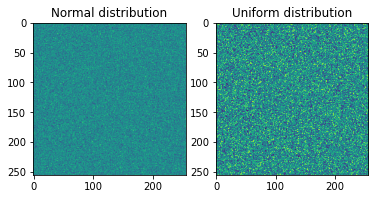

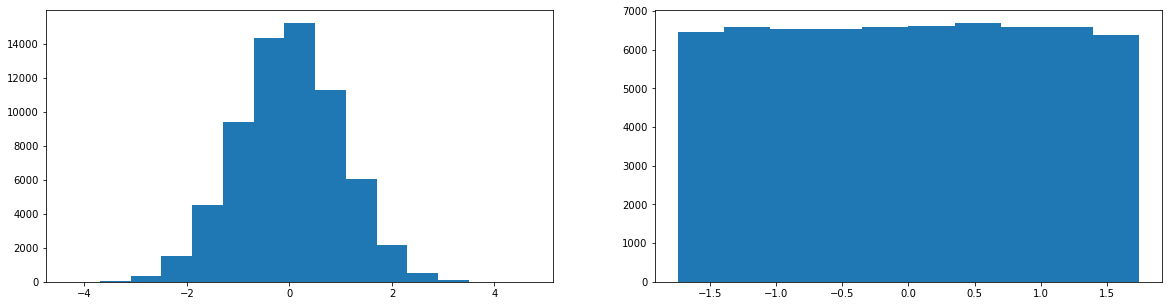

In [3]:
def generateMatrics(size):
    m1 = stats.norm().rvs((size,size))
    m2 = np.random.rand(size,size)
    m2 = m2 - np.average(m2)
    m2 = m2/np.std(m2)
    return m1, m2

n, u = generateMatrics(256)

plt.figure()
plt.subplot(1,2,1)
plt.title("Normal distribution")
plt.imshow(n)
plt.subplot(1,2,2)
plt.title("Uniform distribution")
plt.imshow(u)

plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.hist(np.ravel(n),bins=15)

plt.subplot(1,2,2)
plt.hist(np.ravel(u))
         
plt.show()

In [4]:
no = ga(n,moment=["G1","G1_Classic","G2","G3"])
un = ga(u,moment=["G1","G1_Classic","G2","G3"])
print(no)
print(un)
print(np.log(np.abs(no["G1"]-un["G1"])),np.log(np.abs(no["G1_Classic"]-un["G1_Classic"])))
print(np.log(np.abs(no["G2"]-un["G2"])),np.log(np.abs(no["G3"]-un["G3"])))

{'G1': 0.006510214503204906, 'G1_Classic': 1.99957275390625, 'G2': 0.9988565730488845, 'G3': 0.750264434409623}
{'G1': 0.004834313209402987, 'G1_Classic': 1.999664306640625, 'G2': 0.9993362712576412, 'G3': 0.74994170188453}
-6.391404172569496 -9.29859541973107
-7.642353383553894 -8.038686673489682


In [5]:
2**np.arange(2,9)

array([  4,   8,  16,  32,  64, 128, 256])

In [89]:
sizes = np.arange(5,128)
nsample = 100

for s in sizes:
    lNormal = []
    lUniform = []
    for n in tqdm.tqdm(range(nsample)):
        n, u = generateMatrics(s)
        no = ga(n,moment=["G1","G1_Classic","G2","G3"])
        un = ga(u,moment=["G1","G1_Classic","G2","G3"])
        lNormal.append(no)
        lUniform.append(un)
    lNormal = pd.DataFrame(lNormal)
    lUniform = pd.DataFrame(lUniform)
    lNormal.to_csv("gpaRandomTest/normal_"+str(s)+".csv")
    lUniform.to_csv("gpaRandomTest/uniform_"+str(s)+".csv")
    print(s)
        


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 311.57it/s]


5


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 266.45it/s]


6


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 209.45it/s]


7


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 170.63it/s]


8


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 135.81it/s]


9


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 113.70it/s]


10


100%|█████████████████████████████████████████| 100/100 [00:01<00:00, 99.44it/s]


11


100%|█████████████████████████████████████████| 100/100 [00:01<00:00, 81.44it/s]


12


100%|█████████████████████████████████████████| 100/100 [00:01<00:00, 68.10it/s]


13


100%|█████████████████████████████████████████| 100/100 [00:01<00:00, 56.75it/s]


14


100%|█████████████████████████████████████████| 100/100 [00:01<00:00, 50.37it/s]


15


100%|█████████████████████████████████████████| 100/100 [00:02<00:00, 47.45it/s]


16


100%|█████████████████████████████████████████| 100/100 [00:02<00:00, 42.29it/s]


17


100%|█████████████████████████████████████████| 100/100 [00:02<00:00, 37.37it/s]


18


100%|█████████████████████████████████████████| 100/100 [00:02<00:00, 33.62it/s]


19


100%|█████████████████████████████████████████| 100/100 [00:03<00:00, 30.04it/s]


20


100%|█████████████████████████████████████████| 100/100 [00:03<00:00, 25.58it/s]


21


100%|█████████████████████████████████████████| 100/100 [00:04<00:00, 22.29it/s]


22


100%|█████████████████████████████████████████| 100/100 [00:04<00:00, 20.59it/s]


23


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 18.98it/s]


24


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 17.11it/s]


25


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 16.27it/s]


26


100%|█████████████████████████████████████████| 100/100 [00:07<00:00, 14.17it/s]


27


100%|█████████████████████████████████████████| 100/100 [00:07<00:00, 13.14it/s]


28


100%|█████████████████████████████████████████| 100/100 [00:08<00:00, 12.36it/s]


29


100%|█████████████████████████████████████████| 100/100 [00:08<00:00, 11.61it/s]


30


100%|█████████████████████████████████████████| 100/100 [00:09<00:00, 10.82it/s]


31


100%|█████████████████████████████████████████| 100/100 [00:09<00:00, 10.12it/s]


32


100%|█████████████████████████████████████████| 100/100 [00:10<00:00,  9.20it/s]


33


100%|█████████████████████████████████████████| 100/100 [00:11<00:00,  8.84it/s]


34


100%|█████████████████████████████████████████| 100/100 [00:12<00:00,  8.24it/s]


35


100%|█████████████████████████████████████████| 100/100 [00:12<00:00,  8.16it/s]


36


100%|█████████████████████████████████████████| 100/100 [00:13<00:00,  7.59it/s]


37


100%|█████████████████████████████████████████| 100/100 [00:12<00:00,  7.73it/s]


38


100%|█████████████████████████████████████████| 100/100 [00:14<00:00,  7.14it/s]


39


100%|█████████████████████████████████████████| 100/100 [00:14<00:00,  6.77it/s]


40


100%|█████████████████████████████████████████| 100/100 [00:16<00:00,  6.14it/s]


41


100%|█████████████████████████████████████████| 100/100 [00:17<00:00,  5.66it/s]


42


100%|█████████████████████████████████████████| 100/100 [00:18<00:00,  5.48it/s]


43


100%|█████████████████████████████████████████| 100/100 [00:18<00:00,  5.30it/s]


44


100%|█████████████████████████████████████████| 100/100 [00:19<00:00,  5.02it/s]


45


100%|█████████████████████████████████████████| 100/100 [00:20<00:00,  4.86it/s]


46


100%|█████████████████████████████████████████| 100/100 [00:21<00:00,  4.63it/s]


47


100%|█████████████████████████████████████████| 100/100 [00:22<00:00,  4.38it/s]


48


100%|█████████████████████████████████████████| 100/100 [00:23<00:00,  4.21it/s]


49


100%|█████████████████████████████████████████| 100/100 [00:25<00:00,  3.99it/s]


50


100%|█████████████████████████████████████████| 100/100 [00:26<00:00,  3.80it/s]


51


100%|█████████████████████████████████████████| 100/100 [00:27<00:00,  3.65it/s]


52


100%|█████████████████████████████████████████| 100/100 [00:28<00:00,  3.46it/s]


53


100%|█████████████████████████████████████████| 100/100 [00:30<00:00,  3.24it/s]


54


100%|█████████████████████████████████████████| 100/100 [00:31<00:00,  3.21it/s]


55


100%|█████████████████████████████████████████| 100/100 [00:32<00:00,  3.06it/s]


56


100%|█████████████████████████████████████████| 100/100 [00:34<00:00,  2.93it/s]


57


100%|█████████████████████████████████████████| 100/100 [00:35<00:00,  2.82it/s]


58


100%|█████████████████████████████████████████| 100/100 [00:37<00:00,  2.70it/s]


59


100%|█████████████████████████████████████████| 100/100 [00:38<00:00,  2.60it/s]


60


100%|█████████████████████████████████████████| 100/100 [00:40<00:00,  2.50it/s]


61


100%|█████████████████████████████████████████| 100/100 [00:41<00:00,  2.40it/s]


62


100%|█████████████████████████████████████████| 100/100 [00:44<00:00,  2.27it/s]


63


100%|█████████████████████████████████████████| 100/100 [00:45<00:00,  2.21it/s]


64


100%|█████████████████████████████████████████| 100/100 [00:46<00:00,  2.15it/s]


65


100%|█████████████████████████████████████████| 100/100 [00:47<00:00,  2.08it/s]


66


100%|█████████████████████████████████████████| 100/100 [00:50<00:00,  2.00it/s]


67


100%|█████████████████████████████████████████| 100/100 [00:51<00:00,  1.94it/s]


68


100%|█████████████████████████████████████████| 100/100 [00:53<00:00,  1.86it/s]


69


100%|█████████████████████████████████████████| 100/100 [00:54<00:00,  1.82it/s]


70


100%|█████████████████████████████████████████| 100/100 [00:56<00:00,  1.77it/s]


71


100%|█████████████████████████████████████████| 100/100 [00:58<00:00,  1.71it/s]


72


100%|█████████████████████████████████████████| 100/100 [01:00<00:00,  1.66it/s]


73


100%|█████████████████████████████████████████| 100/100 [01:02<00:00,  1.60it/s]


74


100%|█████████████████████████████████████████| 100/100 [01:04<00:00,  1.55it/s]


75


100%|█████████████████████████████████████████| 100/100 [01:06<00:00,  1.51it/s]


76


100%|█████████████████████████████████████████| 100/100 [01:08<00:00,  1.46it/s]


77


100%|█████████████████████████████████████████| 100/100 [01:10<00:00,  1.41it/s]


78


100%|█████████████████████████████████████████| 100/100 [01:12<00:00,  1.37it/s]


79


100%|█████████████████████████████████████████| 100/100 [01:19<00:00,  1.27it/s]


80


100%|█████████████████████████████████████████| 100/100 [01:23<00:00,  1.19it/s]


81


100%|█████████████████████████████████████████| 100/100 [01:33<00:00,  1.07it/s]


82


100%|█████████████████████████████████████████| 100/100 [01:35<00:00,  1.05it/s]


83


100%|█████████████████████████████████████████| 100/100 [01:36<00:00,  1.04it/s]


84


100%|█████████████████████████████████████████| 100/100 [01:39<00:00,  1.00it/s]


85


100%|█████████████████████████████████████████| 100/100 [01:39<00:00,  1.00it/s]


86


100%|█████████████████████████████████████████| 100/100 [01:43<00:00,  1.03s/it]


87


100%|█████████████████████████████████████████| 100/100 [01:49<00:00,  1.09s/it]


88


100%|█████████████████████████████████████████| 100/100 [01:50<00:00,  1.10s/it]


89


100%|█████████████████████████████████████████| 100/100 [01:51<00:00,  1.12s/it]


90


100%|█████████████████████████████████████████| 100/100 [01:55<00:00,  1.16s/it]


91


100%|█████████████████████████████████████████| 100/100 [02:04<00:00,  1.25s/it]


92


100%|█████████████████████████████████████████| 100/100 [02:03<00:00,  1.23s/it]


93


100%|█████████████████████████████████████████| 100/100 [02:07<00:00,  1.28s/it]


94


100%|█████████████████████████████████████████| 100/100 [02:10<00:00,  1.30s/it]


95


100%|█████████████████████████████████████████| 100/100 [02:15<00:00,  1.35s/it]


96


100%|█████████████████████████████████████████| 100/100 [02:18<00:00,  1.39s/it]


97


100%|█████████████████████████████████████████| 100/100 [02:21<00:00,  1.42s/it]


98


100%|█████████████████████████████████████████| 100/100 [02:24<00:00,  1.44s/it]


99


100%|█████████████████████████████████████████| 100/100 [02:26<00:00,  1.47s/it]


100


100%|█████████████████████████████████████████| 100/100 [02:31<00:00,  1.51s/it]


101


100%|█████████████████████████████████████████| 100/100 [02:34<00:00,  1.55s/it]


102


100%|█████████████████████████████████████████| 100/100 [02:38<00:00,  1.59s/it]


103


100%|█████████████████████████████████████████| 100/100 [02:50<00:00,  1.70s/it]


104


100%|█████████████████████████████████████████| 100/100 [03:00<00:00,  1.80s/it]


105


100%|█████████████████████████████████████████| 100/100 [03:08<00:00,  1.89s/it]


106


100%|█████████████████████████████████████████| 100/100 [03:08<00:00,  1.89s/it]


107


100%|█████████████████████████████████████████| 100/100 [03:11<00:00,  1.91s/it]


108


100%|█████████████████████████████████████████| 100/100 [03:18<00:00,  1.99s/it]


109


100%|█████████████████████████████████████████| 100/100 [03:26<00:00,  2.07s/it]


110


100%|█████████████████████████████████████████| 100/100 [03:33<00:00,  2.14s/it]


111


100%|█████████████████████████████████████████| 100/100 [03:39<00:00,  2.19s/it]


112


100%|█████████████████████████████████████████| 100/100 [03:31<00:00,  2.11s/it]


113


100%|█████████████████████████████████████████| 100/100 [03:34<00:00,  2.14s/it]


114


100%|█████████████████████████████████████████| 100/100 [03:32<00:00,  2.13s/it]


115


100%|█████████████████████████████████████████| 100/100 [03:37<00:00,  2.17s/it]


116


100%|█████████████████████████████████████████| 100/100 [03:45<00:00,  2.25s/it]


117


100%|█████████████████████████████████████████| 100/100 [03:44<00:00,  2.24s/it]


118


100%|█████████████████████████████████████████| 100/100 [03:50<00:00,  2.31s/it]


119


100%|█████████████████████████████████████████| 100/100 [03:56<00:00,  2.37s/it]


120


100%|█████████████████████████████████████████| 100/100 [04:00<00:00,  2.41s/it]


121


100%|█████████████████████████████████████████| 100/100 [04:08<00:00,  2.48s/it]


122


100%|█████████████████████████████████████████| 100/100 [03:51<00:00,  2.32s/it]


123


100%|█████████████████████████████████████████| 100/100 [04:08<00:00,  2.48s/it]


124


100%|█████████████████████████████████████████| 100/100 [04:22<00:00,  2.62s/it]


125


100%|█████████████████████████████████████████| 100/100 [04:23<00:00,  2.64s/it]


126


100%|█████████████████████████████████████████| 100/100 [04:22<00:00,  2.63s/it]

127


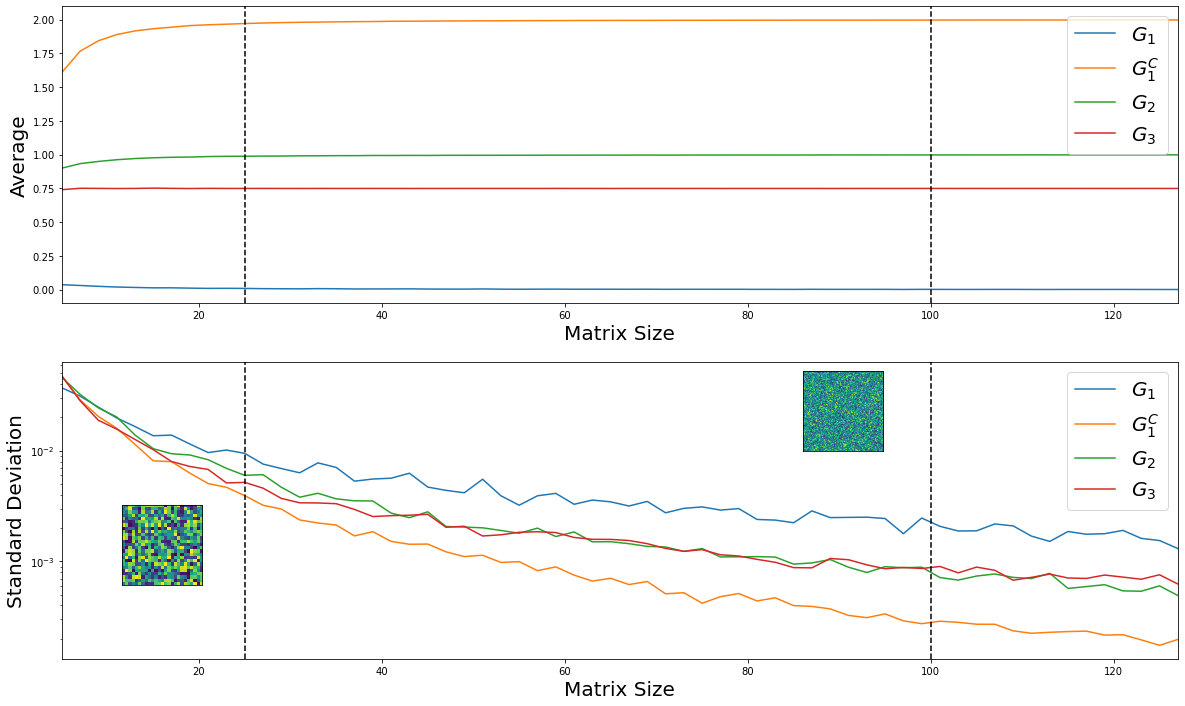

In [13]:
def metric(a,b):
    return np.abs(np.std(a)-np.std(b))

sizes = np.arange(5,128,2)

    

plt.figure(figsize=(20,12))

ax = plt.subplot(2,1,1)

dG1 = []
dG1C = []
dG2 =[]
dG3 = []

for s in sizes:
    u = pd.read_csv("gpaRandomTest/uniform_"+str(s)+".csv")
    n = pd.read_csv("gpaRandomTest/normal_"+str(s)+".csv")
    dG1.append(np.std(u['G1']))
    dG1C.append(np.mean(u['G1_Classic']))
    dG2.append(np.mean(u['G2']) )
    dG3.append(np.mean(u['G3']))

plt.plot(sizes,dG1,label = r"$G_1$")
plt.plot(sizes,dG1C,label = r"$G_1^C$")
plt.plot(sizes,dG2,label = r"$G_2$")
plt.plot(sizes,dG3,label = r"$G_3$")
plt.xlim(min(sizes),max(sizes))
plt.ylabel("Average",fontsize=20)
plt.xlabel("Matrix Size",fontsize=20)
plt.axvline(25,color='k',ls = '--')
plt.axvline(100,color='k',ls = '--')
plt.legend(fontsize=20)


ax = plt.subplot(2,1,2)

dG1 = []
dG1C = []
dG2 =[]
dG3 = []

for s in sizes:
    u = pd.read_csv("gpaRandomTest/uniform_"+str(s)+".csv")
    n = pd.read_csv("gpaRandomTest/normal_"+str(s)+".csv")
    dG1.append(np.std(u['G1']))
    dG1C.append(np.std(u['G1_Classic']))
    dG2.append(np.std(u['G2']) )
    dG3.append(np.std(u['G3']))

plt.semilogy(sizes,dG1,label = r"$G_1$")
plt.semilogy(sizes,dG1C,label = r"$G_1^C$")
plt.semilogy(sizes,dG2,label = r"$G_2$")
plt.semilogy(sizes,dG3,label = r"$G_3$")
plt.xlim(min(sizes),max(sizes))
plt.ylabel("Standard Deviation",fontsize=20)
plt.xlabel("Matrix Size",fontsize=20)
plt.axvline(25,color='k',ls = '--')
plt.axvline(100,color='k',ls = '--')
plt.legend(fontsize=20)
#plt.arrow(25,0.001,-4,0)

axis = ax.inset_axes([0.04,0.25,0.1,0.27])
axis.set_xticks([],[])
axis.set_yticks([],[])
axis.imshow(np.random.rand(25,25))

axis = ax.inset_axes([0.65,0.7,0.1,0.27])
axis.set_xticks([],[])
axis.set_yticks([],[])
axis.imshow(np.random.rand(115,115))

plt.show()

In [167]:

print('{:.2e}'.format(np.average(u['G1']))+u"\u00B1"+'{:.2e}'.format(np.std(u['G1'])) )
'{:.2e}'.format(np.average(u['G1_Classic']))+u"\u00B1"+'{:.2e}'.format(np.std(u['G1_Classic']))

9.10e-03±1.31e-03


'2.00e+00±1.97e-04'

In [160]:
np.average(u['G1'])

0.009101016296290607